In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset = 'model/dataset/dataset.csv'
model_save_path = 'model/gesture_class/gesture_classifier.hdf5'
tflite_save_path = 'model/gesture_class/gesture_classifier.tflite'

# Dataset

In [3]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [4]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.80)

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
y_train_dummy = to_categorical(y_train,2)
y_test_dummy = to_categorical(y_test,2)

# Neural network model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               11008     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training 

In [12]:
history = model.fit(
    X_train,
    y_train_dummy,
    epochs=200,
    batch_size=64,
    validation_data=(X_test, y_test_dummy),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/200
53/53 [==============================] - 1s 4ms/step - loss: 0.4073 - accuracy: 0.8214 - val_loss: 0.2478 - val_accuracy: 0.9195

Epoch 00001: saving model to model/gesture_class\gesture_classifier.hdf5
Epoch 2/200
53/53 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.8836 - val_loss: 0.2418 - val_accuracy: 0.9018

Epoch 00002: saving model to model/gesture_class\gesture_classifier.hdf5
Epoch 3/200
53/53 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.8877 - val_loss: 0.1750 - val_accuracy: 0.9337

Epoch 00003: saving model to model/gesture_class\gesture_classifier.hdf5
Epoch 4/200
53/53 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9132 - val_loss: 0.2953 - val_accuracy: 0.8876

Epoch 00004: saving model to model/gesture_class\gesture_classifier.hdf5
Epoch 5/200
53/53 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9168 - val_loss: 0.1224 - val_accuracy: 0.9645

53/53 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.9692 - val_loss: 0.0393 - val_accuracy: 0.9905

Epoch 00039: saving model to model/gesture_class\gesture_classifier.hdf5
Epoch 40/200
53/53 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9725 - val_loss: 0.0410 - val_accuracy: 0.9917

Epoch 00040: saving model to model/gesture_class\gesture_classifier.hdf5
Epoch 41/200
53/53 [==============================] - 0s 2ms/step - loss: 0.0899 - accuracy: 0.9736 - val_loss: 0.0357 - val_accuracy: 0.9905

Epoch 00041: saving model to model/gesture_class\gesture_classifier.hdf5
Epoch 42/200
53/53 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.9704 - val_loss: 0.0439 - val_accuracy: 0.9858

Epoch 00042: saving model to model/gesture_class\gesture_classifier.hdf5
Epoch 43/200
53/53 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9754 - val_loss: 0.0615 - val_accuracy: 0.9846

Epoch 

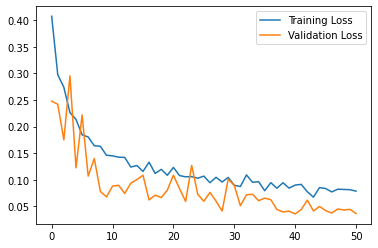

In [13]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [14]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test_dummy, batch_size=64)

14/14 [==============================] - 0s 539us/step - loss: 0.0365 - accuracy: 0.9929


In [15]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

# Confusion matrix

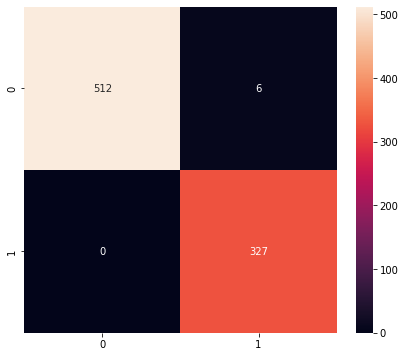

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       518
           1       0.98      1.00      0.99       327

    accuracy                           0.99       845
   macro avg       0.99      0.99      0.99       845
weighted avg       0.99      0.99      0.99       845



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\giand\AppData\Local\Temp\tmpkehx4cmi\assets


56448